In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import warnings
warnings.filterwarnings('ignore') #close python warnings


In [2]:
data = pd.read_csv('olympics_data.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [3]:
unique_events = pd.unique(data.Event)
print('Unique Event : {}'.format(len(unique_events)))
unique_events[:10]

Unique Event : 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [4]:
data_copy = data.copy() #do not mess up with real data
weight_height_list = ['Height','Weight']
for u in unique_events:
    event_filter = data_copy.Event == u
    filter = data_copy[event_filter]

    #mean of height and weight
    for l in weight_height_list:
        average = np.round(np.mean(filter[l]),2)
        if ~np.isnan(average): # if there is mean in events
            filter[l] = filter[l].fillna(average)
        else:
            all_data_mean = np.round(np.mean(data[l]),2)
            filter[l] = filter[l].fillna(all_data_mean)
    data_copy[event_filter] = filter

data =  data_copy.copy()
data.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,177.48,73.09,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
#filling Age column according to average of all ages

age_average = np.round(np.mean(data.Age),2)
data['Age'] = data['Age'].fillna(age_average)


In [6]:
# take off sports who is not getting Medal
medal = data['Medal']
medal_filter = ~pd.isnull(medal)
data = data[medal_filter]
data.to_csv('olympics.csv', index=False)

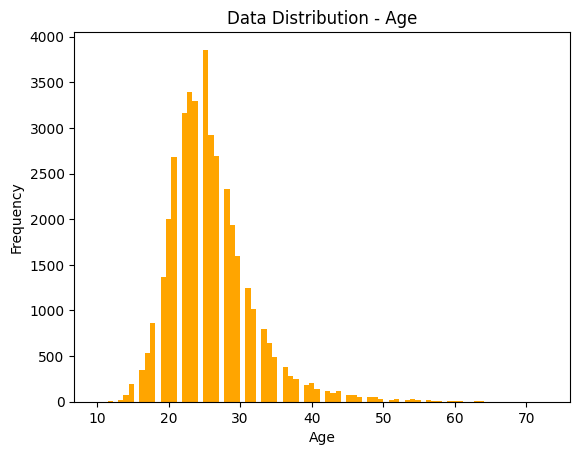

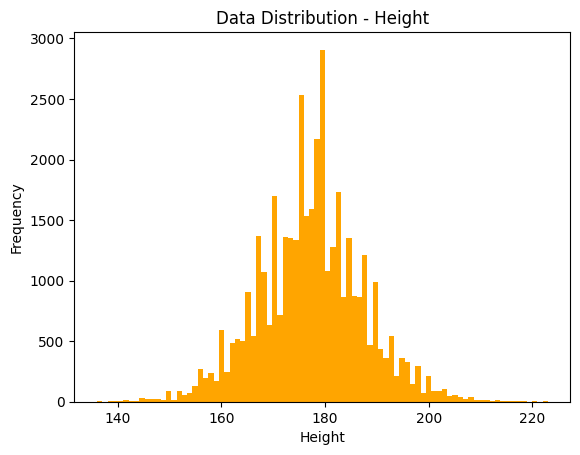

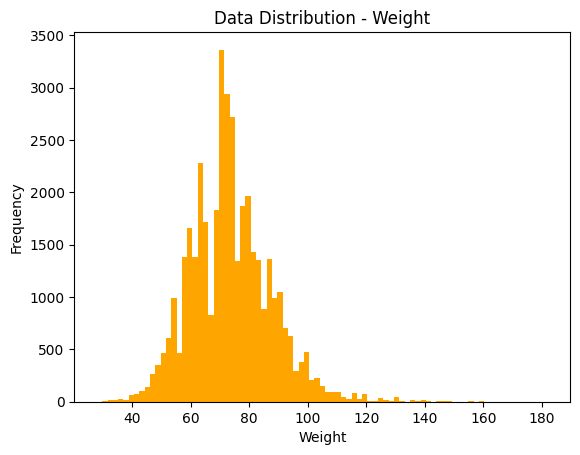

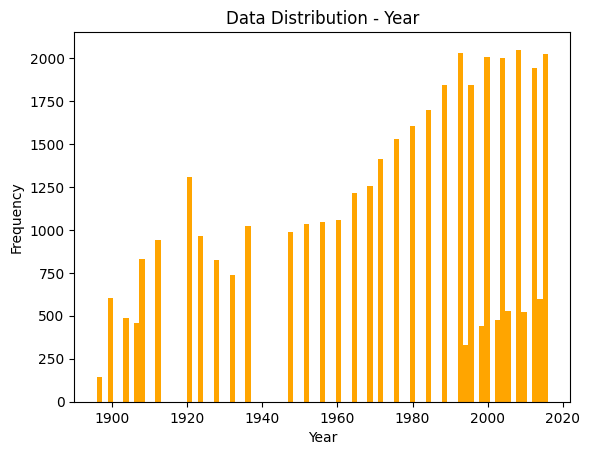

In [7]:
#histogram graphs

def plotHistogram(value):
    plt.figure()
    plt.hist(data[value], bins=85, color='orange') #bins = space
    plt.xlabel(value)
    plt.ylabel('Frequency')
    plt.title('Data Distribution - {}'.format(value))
    plt.show()

int_values = ['Age', 'Height', 'Weight', 'Year']
for v in int_values:
    plotHistogram(v)


In [8]:
data.describe()

,ID,Age,Height,Weight,Year
count,39783.000000,39783.000000,39783.000000,39783.000000,39783.000000
mean,69407.051806,25.918456,177.336690,73.738320,1973.943845
std,38849.980737,5.859569,10.170124,13.979041,33.822857
min,4.000000,10.000000,136.000000,28.000000,1896.000000
25%,36494.000000,22.000000,170.000000,64.000000,1952.000000
50%,68990.000000,25.000000,177.480000,73.000000,1984.000000
75%,103461.500000,29.000000,184.000000,82.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000


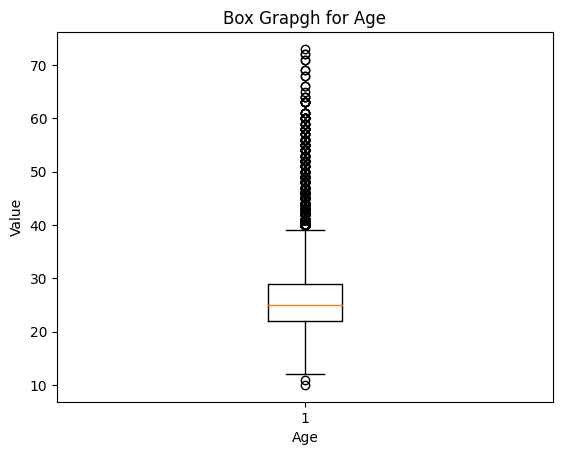

In [9]:
#box graphs

plt.boxplot(data.Age)
plt.title('Box Grapgh for Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

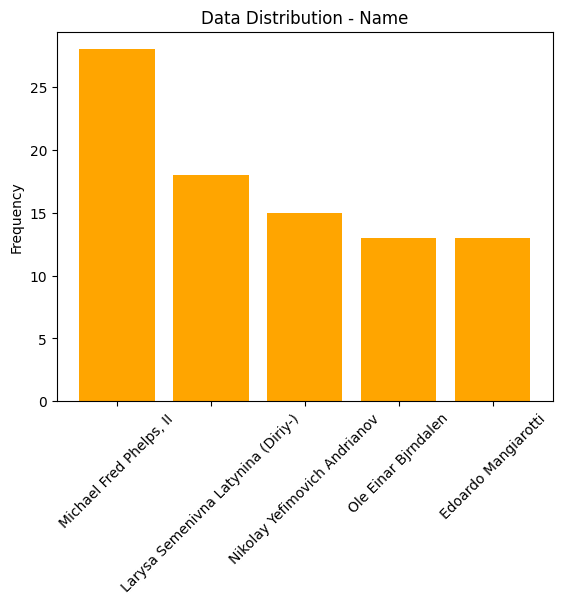

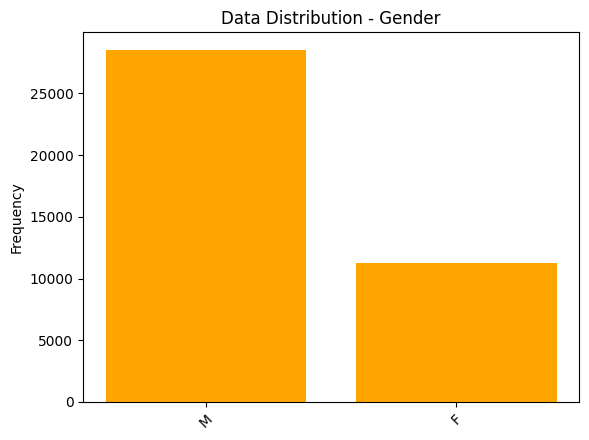

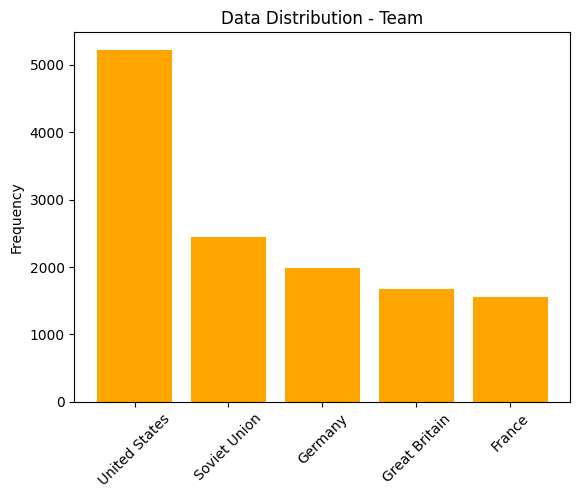

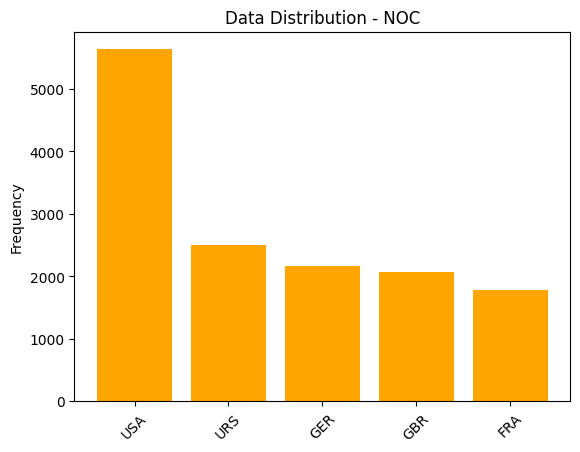

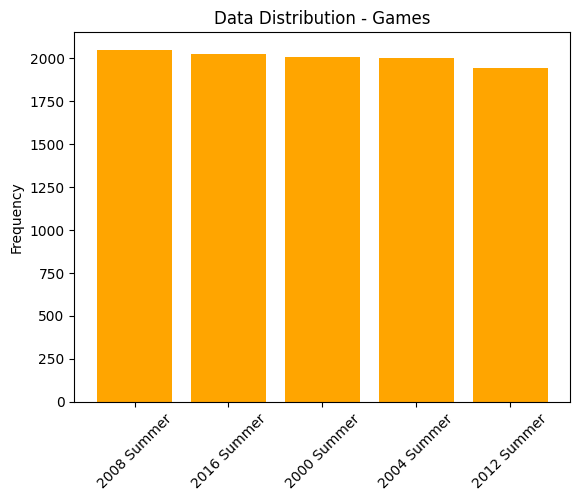

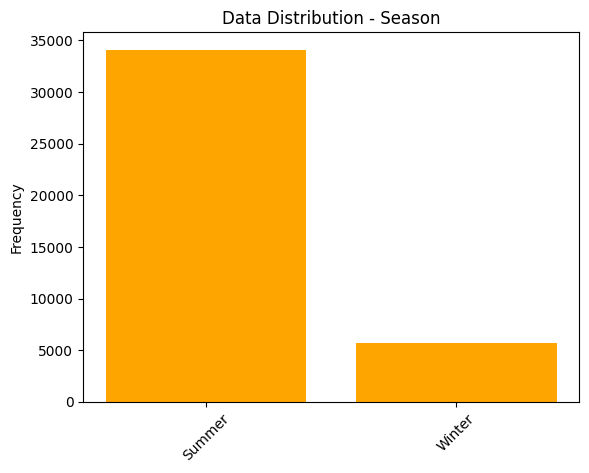

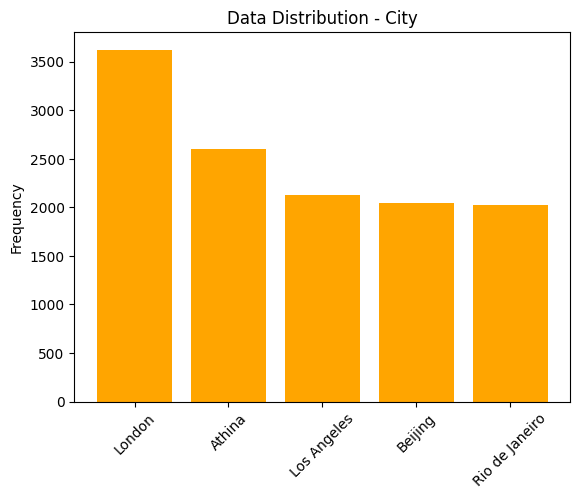

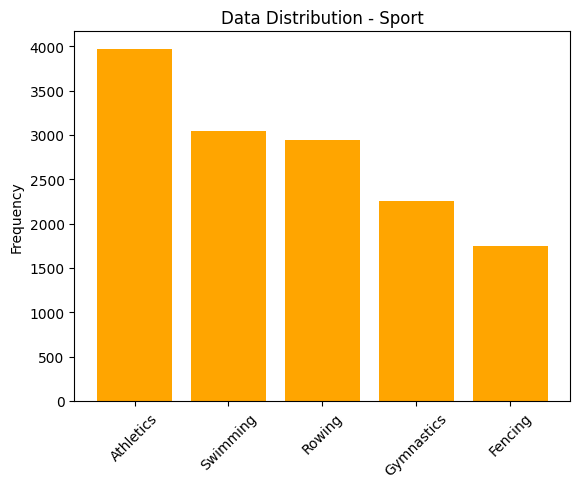

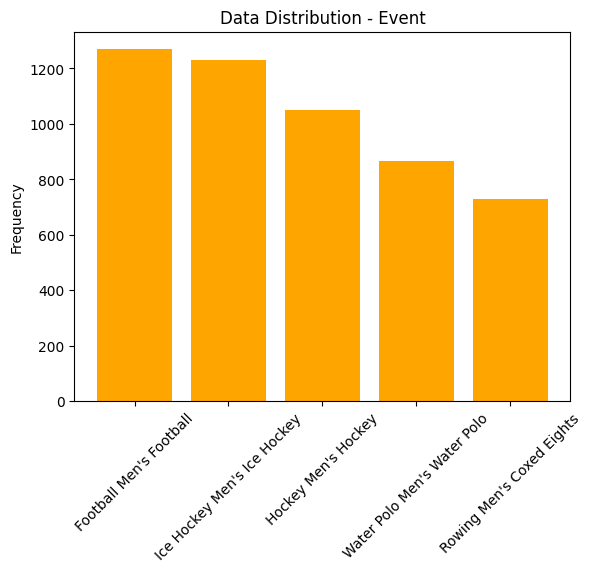

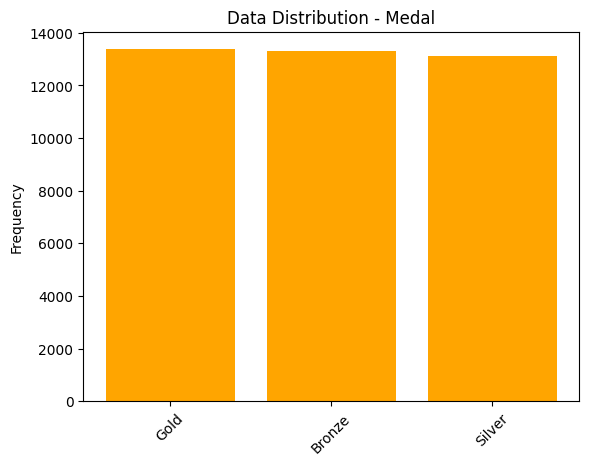

In [10]:
def plotBar(value, n=5): #top 5 value
    data_ = data[value]
    count_data = data_.value_counts()
    count_data = count_data[:5]
    plt.figure()
    plt.bar(count_data.index, count_data, color='orange')
    plt.xticks(count_data.index, count_data.index.values)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.title('Data Distribution - {}'.format(value))
    plt.show()

variables = ['Name','Gender','Team','NOC','Games','Season', 'City', 'Sport', 'Event', 'Medal']
for i in variables:
    plotBar(i)

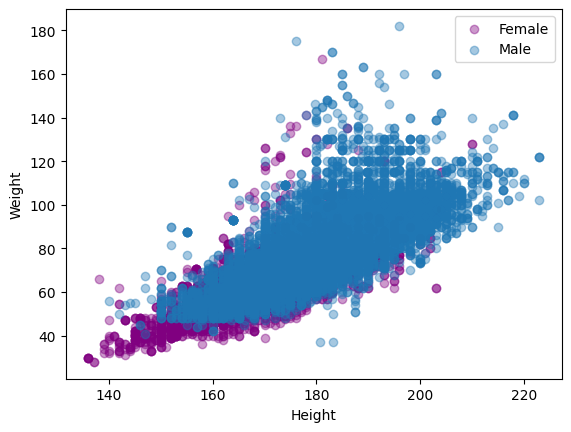

In [11]:
#Height and weight according to gender

male = data[data.Gender =='M']
female = data[data.Gender == 'F']
plt.figure()
plt.scatter(female.Height, female.Weight, alpha=0.4, label='Female', color='Purple')
plt.scatter(male.Height, male.Weight, alpha=0.4, label='Male')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [12]:
data.loc[:,['Age','Height','Weight']].corr() #correlation table

,Age,Height,Weight
Age,1.000000,0.061890,0.136349
Height,0.061890,1.000000,0.794368
Weight,0.136349,0.794368,1.000000


In [13]:
#categorize sports according to medals
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy, columns=['Medal'])
data_copy.loc[:,['Age', 'Medal_Bronze', 'Medal_Gold', 'Medal_Silver']].corr()

,Age,Medal_Bronze,Medal_Gold,Medal_Silver
Age,1.000000,-0.005584,-0.002576,0.008192
Medal_Bronze,-0.005584,1.000000,-0.504110,-0.496859
Medal_Gold,-0.002576,-0.504110,1.000000,-0.499022
Medal_Silver,0.008192,-0.496859,-0.499022,1.000000


In [14]:
#group by teams according to medals

data_copy.loc[:,['Team','Medal_Bronze', 'Medal_Gold', 'Medal_Silver']].groupby(['Team'], as_index=False).sum().sort_values(by='Medal_Gold', ascending=False)[:10]

,Team,Medal_Bronze,Medal_Gold,Medal_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
420,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


In [15]:
#group by medals according to cities

data_copy.loc[:,['City','Medal_Bronze', 'Medal_Gold', 'Medal_Silver']].groupby(['City'], as_index=False).sum().sort_values(by='Medal_Gold', ascending=False)[:5]

,City,Medal_Bronze,Medal_Gold,Medal_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655


Pivot Table

In [16]:
pvt = data.pivot_table(index='Medal',columns='Gender',values=['Height','Weight','Age'], 
                       aggfunc={'Height':np.mean, 'Weight':np.mean,'Age':[min,max,np.std]})
pvt.head()

Age                                            Height              \
         max         min             std                  mean               
Gender     F     M     F     M         F         M           F           M   
Medal                                                                        
Bronze  69.0  72.0  12.0  10.0  5.329229  5.870340  170.003227  180.045806   
Gold    63.0  64.0  13.0  13.0  5.219615  5.987807  170.448727  180.318906   
Silver  55.0  73.0  11.0  13.0  5.253111  6.098221  170.233783  180.053626   

           Weight             
             mean             
Gender          F          M  
Medal                         
Bronze  62.757125  77.841504  
Gold    63.199349  78.186505  
Silver  62.866892  77.960887

Anomaly Detection

In [17]:
def anomaly_datection(df,feature):
    outlier_indices = []
    for c in feature:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        # IQR = Inter Quartile Range
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[c] < Q1 -outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices) #unique outliers

    multiple_outliers = list(i for i, v in outlier_indices.items() if v >1)
    return multiple_outliers

In [18]:
data_anomaly = data.loc[anomaly_datection(data,['Age', 'Height','Weight'])]
data_anomaly.Sport.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: Sport, dtype: int64

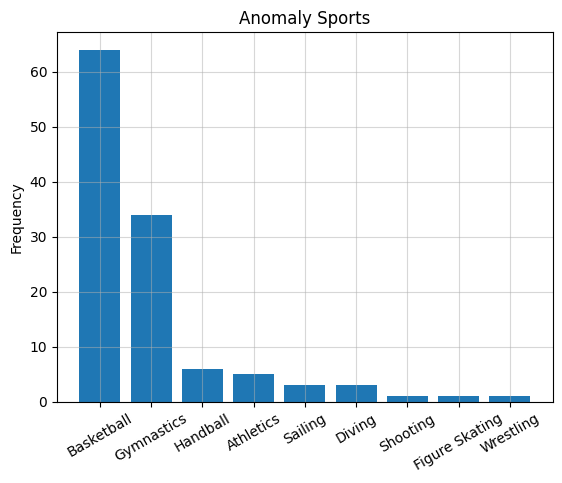

In [19]:
plt.figure()
plt.bar(data_anomaly.Sport.value_counts().index, data_anomaly.Sport.value_counts().values)
plt.xticks(rotation=30)
plt.title('Anomaly Sports')
plt.ylabel('Frequency')
plt.grid(True,alpha=0.5)
plt.show()


In [20]:
data_gym = data_anomaly[data_anomaly.Sport == 'Gymnastics'][:10]
data_gym

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
13741,7444,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004 Summer,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,11223,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,12485,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,24456,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984 Summer,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,27569,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,27569,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,40866,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


Data Analysis in Time Series

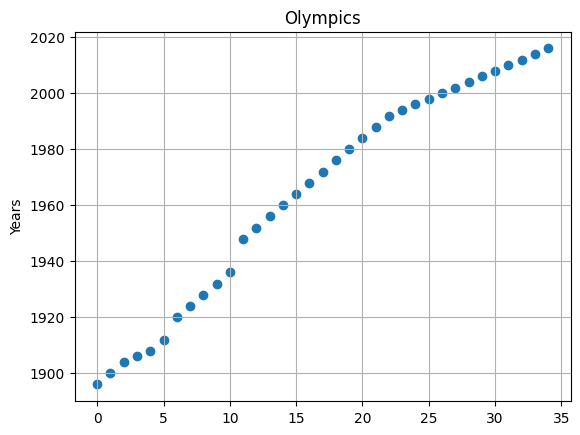

In [21]:
data_time = data.copy()
unique_times = data_time.Year.unique()
sorted_times = np.sort(unique_times) 
plt.figure()
plt.scatter(range(len(sorted_times)), sorted_times)
plt.grid(True)
plt.ylabel('Years')
plt.title('Olympics')
plt.show()

In [22]:
date = pd.to_datetime(data_time['Year'], format='%Y')
data_time['date'] = date #created new column
data_time = data_time.set_index('date')
data_time.drop(['Year'],axis=1, inplace=True)


In [23]:
data_time

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
date,,,,,,,,,,,,,,
1900-01-01,4,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,15,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,15,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,16,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014 Winter,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,17,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956-01-01,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,1956 Summer,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
1964-01-01,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,1964 Summer,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
1980-01-01,135554,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,1980 Summer,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


In [24]:
periodical_data = data_time.resample('2A').mean() # getting mean within 2 years
periodical_data.dropna(axis=0,inplace=True) # taking off missing data
periodical_data

,ID,Age,Height,Weight
date,,,,
1896-12-31,68382.734266,23.905734,174.280350,72.734056
1900-12-31,65155.880795,27.786689,177.882301,74.979950
1904-12-31,67955.240741,26.363868,177.241091,74.330823
1906-12-31,68550.668122,26.479389,176.347576,74.072183
1908-12-31,66881.845969,27.566739,176.662419,73.721107
1912-12-31,66337.363443,27.491945,176.890244,74.321467
1920-12-31,66627.027523,29.261315,176.333012,73.246437
1924-12-31,68185.471933,27.993929,176.658212,74.427058
1928-12-31,66768.357230,26.279320,175.687934,72.530049


<Figure size 640x480 with 0 Axes>

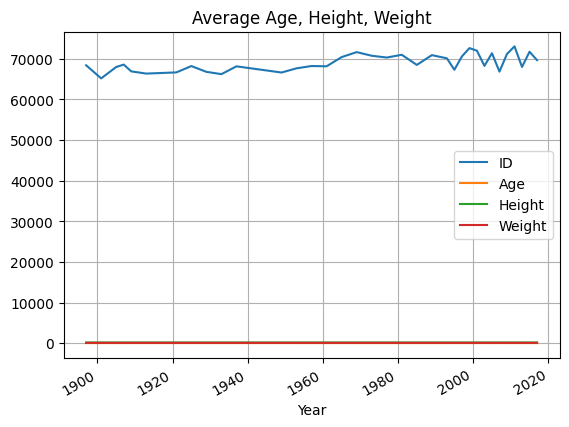

In [25]:
plt.figure()
periodical_data.plot()
plt.title('Average Age, Height, Weight')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [26]:
data_time = pd.get_dummies(data_time,columns=['Medal'])
data_time

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
date,,,,,,,,,,,,,,,,
1900-01-01,4,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,15,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,15,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
2014-01-01,16,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014 Winter,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1948-01-01,17,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956-01-01,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,1956 Summer,Summer,Melbourne,Athletics,Athletics Women's Shot Put,0,0,1
1964-01-01,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,1964 Summer,Summer,Tokyo,Athletics,Athletics Women's Shot Put,1,0,0
1980-01-01,135554,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,1980 Summer,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",1,0,0


In [28]:
periodical_data = data_time.resample('2A').sum()
periodical_data = periodical_data[~(periodical_data == 0).any(axis=1)]
periodical_data.tail()

,ID,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
date,,,,,,,
2008-12-31,145735808,53344.0,365157.91,152090.92,710,671,667
2010-12-31,37980876,13896.0,91395.00,37877.12,171,174,175
2012-12-31,131928738,50595.0,346091.47,143102.94,679,632,630
2014-12-31,42810504,15907.0,104686.00,42838.63,198,202,197
2016-12-31,140874981,53256.0,360846.03,149628.71,703,665,655


<Figure size 640x480 with 0 Axes>

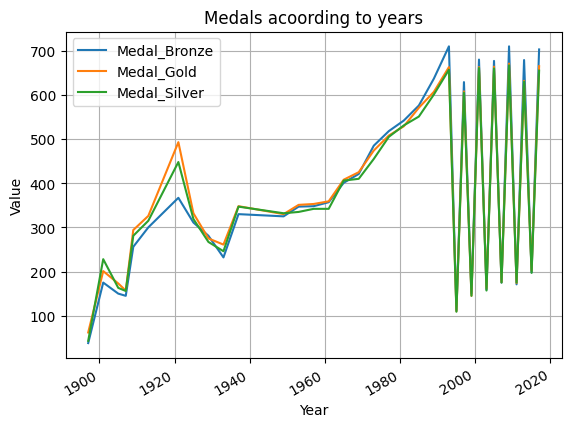

In [30]:
plt.figure()
periodical_data.loc[:,['Medal_Bronze','Medal_Gold','Medal_Silver']].plot()
plt.title('Medals acoording to years')
plt.ylabel('Value')
plt.xlabel('Year')
plt.grid()
plt.show()


In [33]:
#separate data between summer and winter

summer = data_time[data_time.Season == 'Summer']
winter = data_time[data_time.Season == 'Winter']
periodical_data_winter = winter.resample('A').sum()
periodical_data_winter = periodical_data_winter[~(periodical_data_winter == 0).any(axis=1)]
periodical_data_winter.head()
periodical_data_summer = summer.resample('A').sum()
periodical_data_summer = periodical_data_summer[~(periodical_data_summer == 0).any(axis=1)]
periodical_data_summer.head()

,ID,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
date,,,,,,,
1896-12-31,9778731,3418.52,24922.09,10400.97,38,62,43
1900-12-31,39354152,16783.16,107440.91,45287.89,175,201,228
1904-12-31,33026247,12812.84,86139.17,36124.78,150,173,163
1906-12-31,31396206,12127.56,80767.19,33925.06,145,157,156
1908-12-31,55578814,22907.96,146806.47,61262.24,256,294,281


<Figure size 640x480 with 0 Axes>

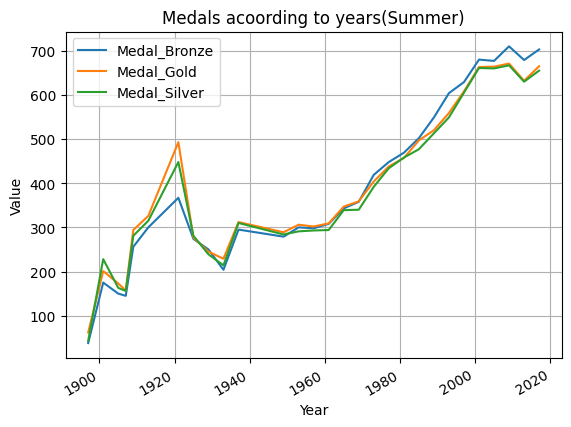

<Figure size 640x480 with 0 Axes>

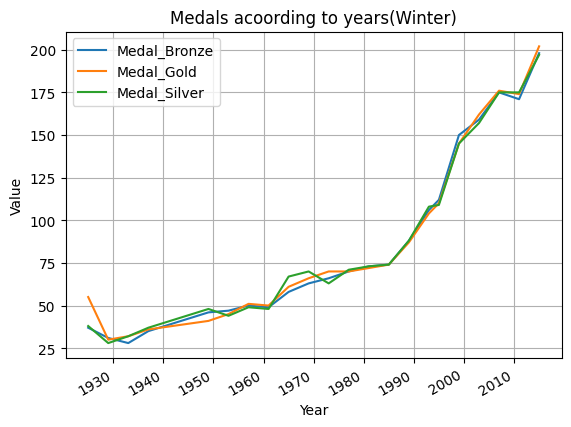

In [35]:
plt.figure()
periodical_data_summer.loc[:,['Medal_Bronze','Medal_Gold','Medal_Silver']].plot()
plt.title('Medals acoording to years(Summer)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.grid()
plt.show()

plt.figure()
periodical_data_winter.loc[:,['Medal_Bronze','Medal_Gold','Medal_Silver']].plot()
plt.title('Medals acoording to years(Winter)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.grid()
plt.show()